In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plot 
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from joblib import dump, load 

In [2]:
df_train=pd.read_csv('rossmann-store-sales/train.csv')
df_store=pd.read_csv('rossmann-store-sales/store.csv')


C:\Users\26amr\AppData\Local\Temp\ipykernel_42544\3553475983.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train=pd.read_csv('rossmann-store-sales/train.csv')


In [3]:
# merge the dataset 
df_all=pd.merge(df_train,df_store, on='Store',how='inner')
df_all.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [5]:
df_all['Date']=pd.to_datetime(df_all['Date'])

df_all['Day']=df_all['Date'].dt.day
df_all['Month']=df_all['Date'].dt.month
df_all['Year']=df_all['Date'].dt.year

df_all=df_all.set_index('Date',drop=True)

In [6]:
df_all.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
Date,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,31,7,2015
2015-07-31,2,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015
2015-07-31,3,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
2015-07-31,4,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,31,7,2015
2015-07-31,5,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,31,7,2015


In [7]:
df_all=df_all.drop(columns=['Promo2SinceWeek','Promo2SinceYear','PromoInterval','Open','Store'])
df_all.head()

,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Day,Month,Year
Date,,,,,,,,,,,,,,,
2015-07-31,5,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,31,7,2015
2015-07-31,5,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,31,7,2015
2015-07-31,5,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,31,7,2015
2015-07-31,5,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,31,7,2015
2015-07-31,5,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,31,7,2015


# Handel Missing Values

In [8]:
df_all.isna().sum()

DayOfWeek                         0
Sales                             0
Customers                         0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Day                               0
Month                             0
Year                              0
dtype: int64

In [9]:
def fill_nan_by_distribution(df, col):
    np.random.seed(42)
    
    value_counts = df[col].value_counts(normalize=True)
    
    
    n_missing = df[col].isna().sum()
    
    
    sampled_values = np.random.choice(
        value_counts.index, 
        size=n_missing, 
        p=value_counts.values
    )
    
    
    df.loc[df[col].isna(), col] = sampled_values
    return df

In [10]:
df_all = fill_nan_by_distribution(df_all , 'CompetitionOpenSinceMonth')
df_all = fill_nan_by_distribution(df_all , 'CompetitionOpenSinceYear')
df_all = df_all.dropna(subset=['CompetitionDistance'])
df_all.isna().sum()

DayOfWeek                    0
Sales                        0
Customers                    0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Day                          0
Month                        0
Year                         0
dtype: int64

In [11]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1014567 entries, 2015-07-31 to 2013-01-01
Data columns (total 15 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   DayOfWeek                  1014567 non-null  int64  
 1   Sales                      1014567 non-null  int64  
 2   Customers                  1014567 non-null  int64  
 3   Promo                      1014567 non-null  int64  
 4   StateHoliday               1014567 non-null  object 
 5   SchoolHoliday              1014567 non-null  int64  
 6   StoreType                  1014567 non-null  object 
 7   Assortment                 1014567 non-null  object 
 8   CompetitionDistance        1014567 non-null  float64
 9   CompetitionOpenSinceMonth  1014567 non-null  float64
 10  CompetitionOpenSinceYear   1014567 non-null  float64
 11  Promo2                     1014567 non-null  int64  
 12  Day                        1014567 non-null  int32  
 1

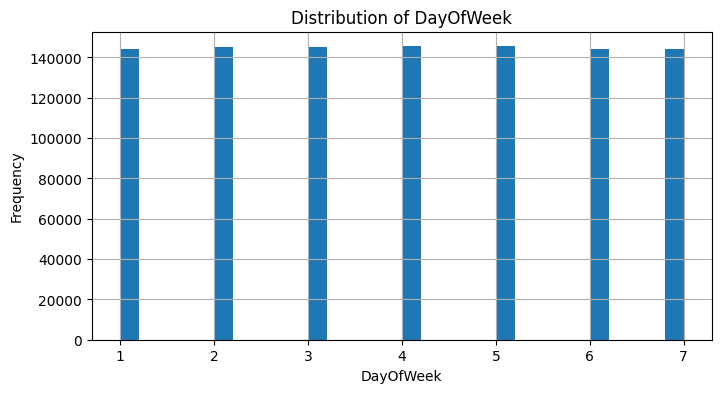

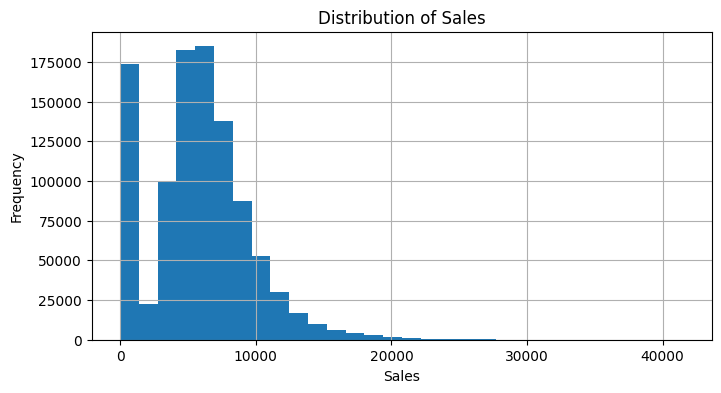

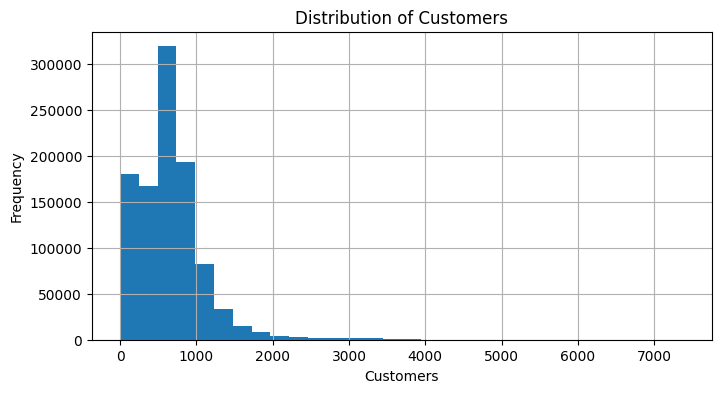

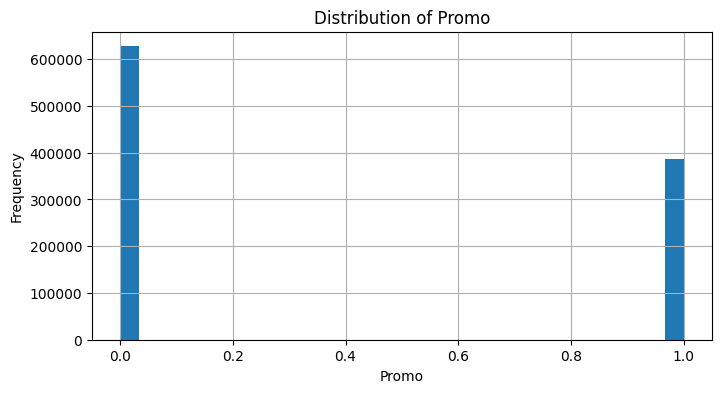

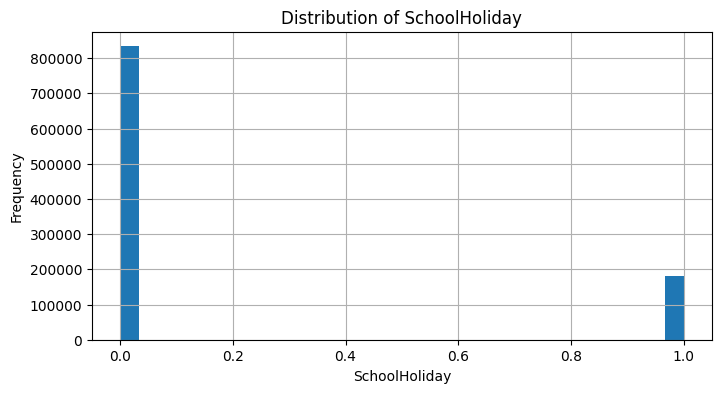

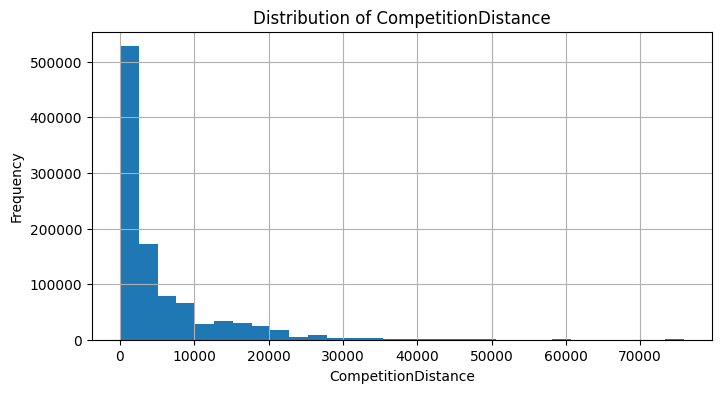

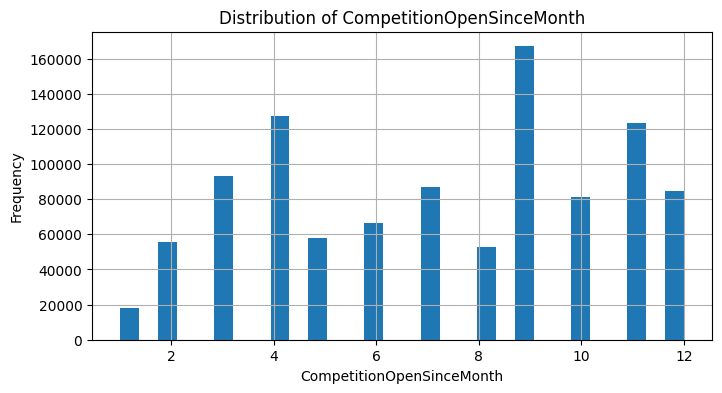

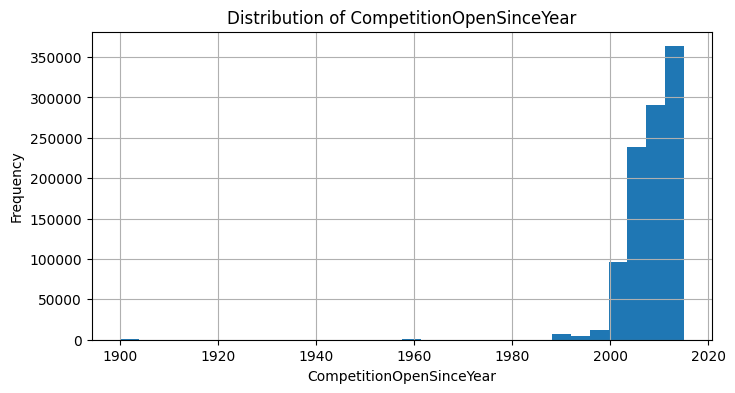

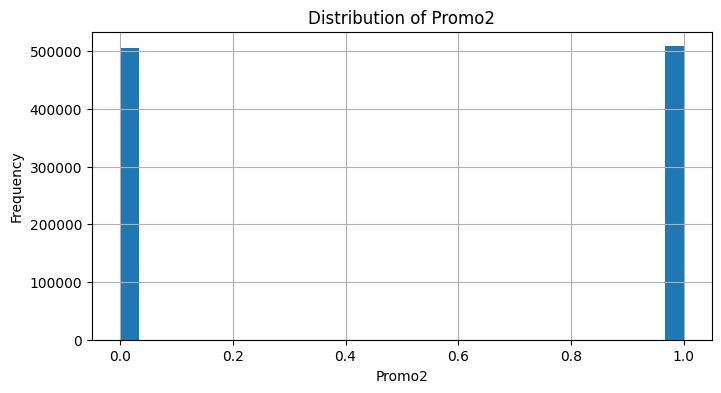

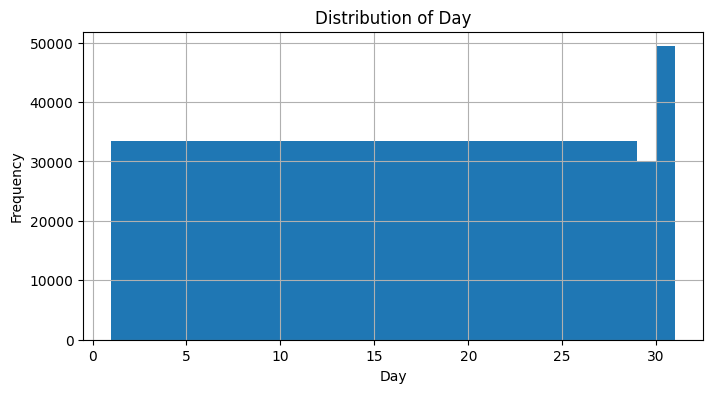

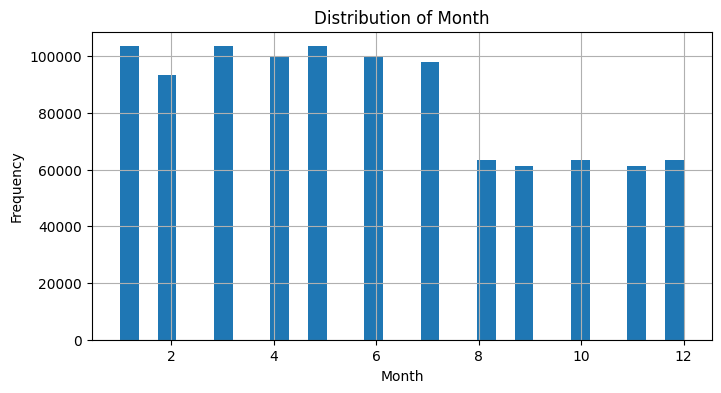

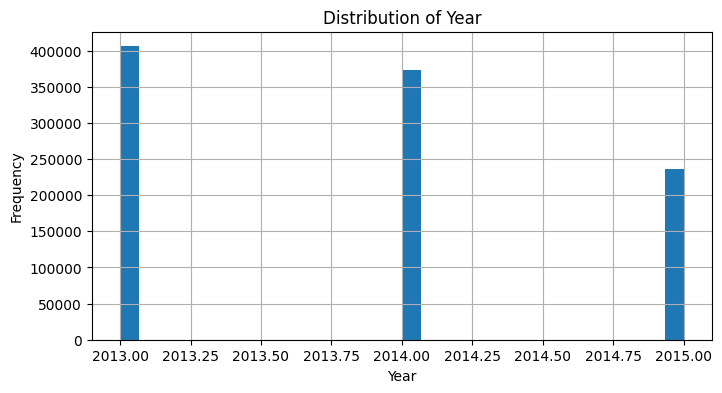

In [12]:
import matplotlib.pyplot as plt

# Let's assume your dataframe is called df

# Select only integer columns
int_columns = df_all.select_dtypes(include=['int', 'float']).columns

for col in int_columns:
    plt.figure(figsize=(8, 4))
    df_all[col].dropna().hist(bins=30)  # Drop NaNs to avoid errors
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


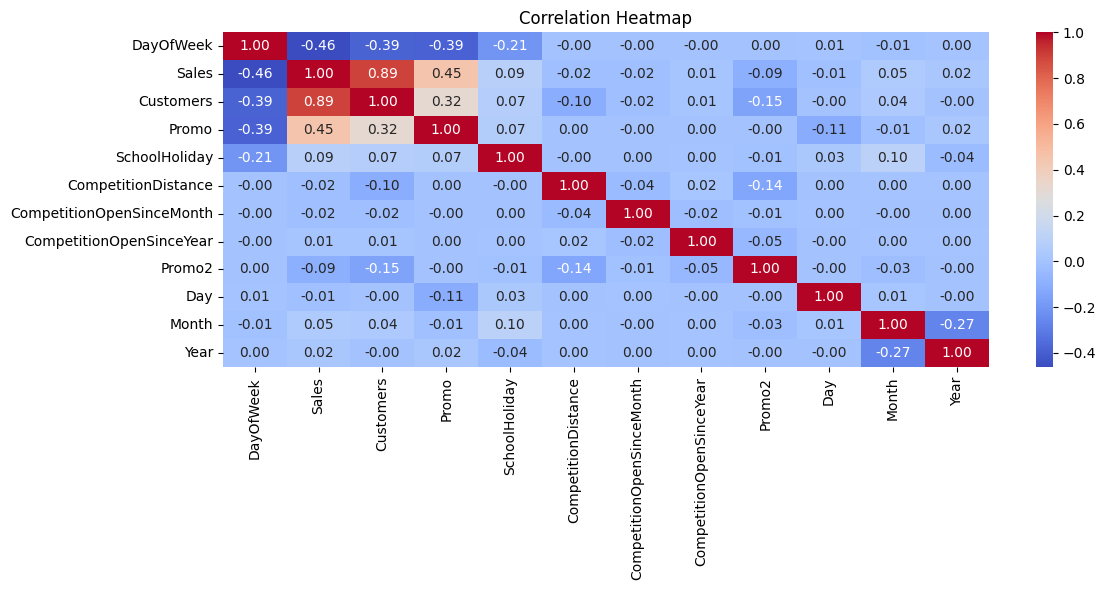

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns 

numeric_df = df_all.select_dtypes(include=['number'])

plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

<Axes: >

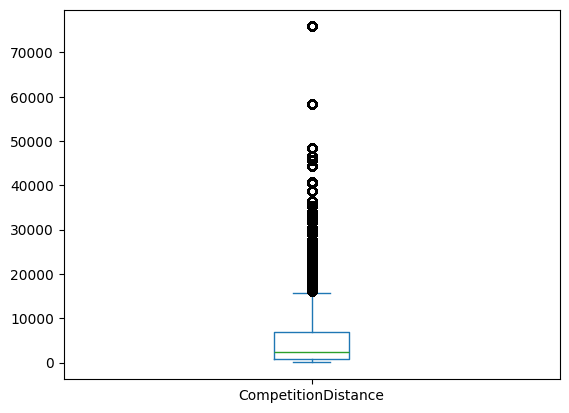

In [14]:
df_all['CompetitionDistance'].plot.box()

In [15]:
df_all['CompetitionDistance'] = np.log(df_all['CompetitionDistance'])

<Axes: >

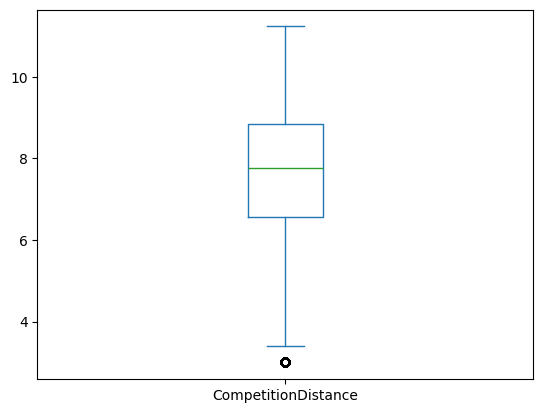

In [16]:
df_all['CompetitionDistance'].plot.box()

In [17]:
# categorical 
df_all.head()

,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Day,Month,Year
Date,,,,,,,,,,,,,,,
2015-07-31,5,5263,555,1,0,1,c,a,7.146772,9.0,2008.0,0,31,7,2015
2015-07-31,5,6064,625,1,0,1,a,a,6.345636,11.0,2007.0,1,31,7,2015
2015-07-31,5,8314,821,1,0,1,a,a,9.556055,12.0,2006.0,1,31,7,2015
2015-07-31,5,13995,1498,1,0,1,c,c,6.429719,9.0,2009.0,0,31,7,2015
2015-07-31,5,4822,559,1,0,1,a,a,10.305948,4.0,2015.0,0,31,7,2015


# one hot encoding vs label encoding

In [18]:
categorical_cols=['StateHoliday','StoreType','Assortment']
df_com_onehot = pd.get_dummies(df_all, columns=categorical_cols, drop_first=True).astype(int)

In [19]:
df_com_onehot.head()

,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Day,...,Year,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,5,5263,555,1,1,7,9,2008,0,31,...,2015,1,0,0,0,0,1,0,0,0
2015-07-31,5,6064,625,1,1,6,11,2007,1,31,...,2015,1,0,0,0,0,0,0,0,0
2015-07-31,5,8314,821,1,1,9,12,2006,1,31,...,2015,1,0,0,0,0,0,0,0,0
2015-07-31,5,13995,1498,1,1,6,9,2009,0,31,...,2015,1,0,0,0,0,1,0,0,1
2015-07-31,5,4822,559,1,1,10,4,2015,0,31,...,2015,1,0,0,0,0,0,0,0,0


## label encoding

In [20]:
mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
df_com_la = df_all.copy()

df_com_la['StoreType'] = df_com_la['StoreType'].map(mappings)
df_com_la['Assortment'] = df_com_la['Assortment'].map(mappings)
df_com_la['StateHoliday'] = df_com_la['StateHoliday'].map(mappings)

In [21]:
df_com_la.head()

,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Day,Month,Year
Date,,,,,,,,,,,,,,,
2015-07-31,5,5263,555,1,0.0,1,3,1,7.146772,9.0,2008.0,0,31,7,2015
2015-07-31,5,6064,625,1,0.0,1,1,1,6.345636,11.0,2007.0,1,31,7,2015
2015-07-31,5,8314,821,1,0.0,1,1,1,9.556055,12.0,2006.0,1,31,7,2015
2015-07-31,5,13995,1498,1,0.0,1,3,3,6.429719,9.0,2009.0,0,31,7,2015
2015-07-31,5,4822,559,1,0.0,1,1,1,10.305948,4.0,2015.0,0,31,7,2015


# Normalize the data

In [22]:
def split_data(df):
    df.sort_index(inplace=True)

    total_len = len(df)
    
    train_end = int(0.7 * total_len)
    val_end = int(0.9 * total_len)  # 70% + 20% = 90%
    
    # Split features and target
    X = df.drop(columns=['Sales'])
    y = df['Sales']
    
    # Manual split
    X_train = X.iloc[:train_end]
    X_val= X.iloc[train_end:val_end]
    X_test= X.iloc[val_end:]
    
    y_train = (y.iloc[:train_end])
    y_val = (y.iloc[train_end:val_end])
    y_test = (y.iloc[val_end:])
    return (X_train,y_train ), (X_val,y_val ), (X_test,y_test )

# Metrics for evaluation

In [23]:
def rmspe(y, yhat):
    y, yhat = np.array(y), np.array(yhat)
    mask = y != 0
    return np.sqrt(np.mean(((yhat[mask] / y[mask]) - 1) ** 2))
def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

In [24]:
(X_train_onehot,y_train_onehot ), (X_val_onehot,y_val_onehot ), (X_test_onehot,y_test_onehot ) = split_data(df_com_onehot)

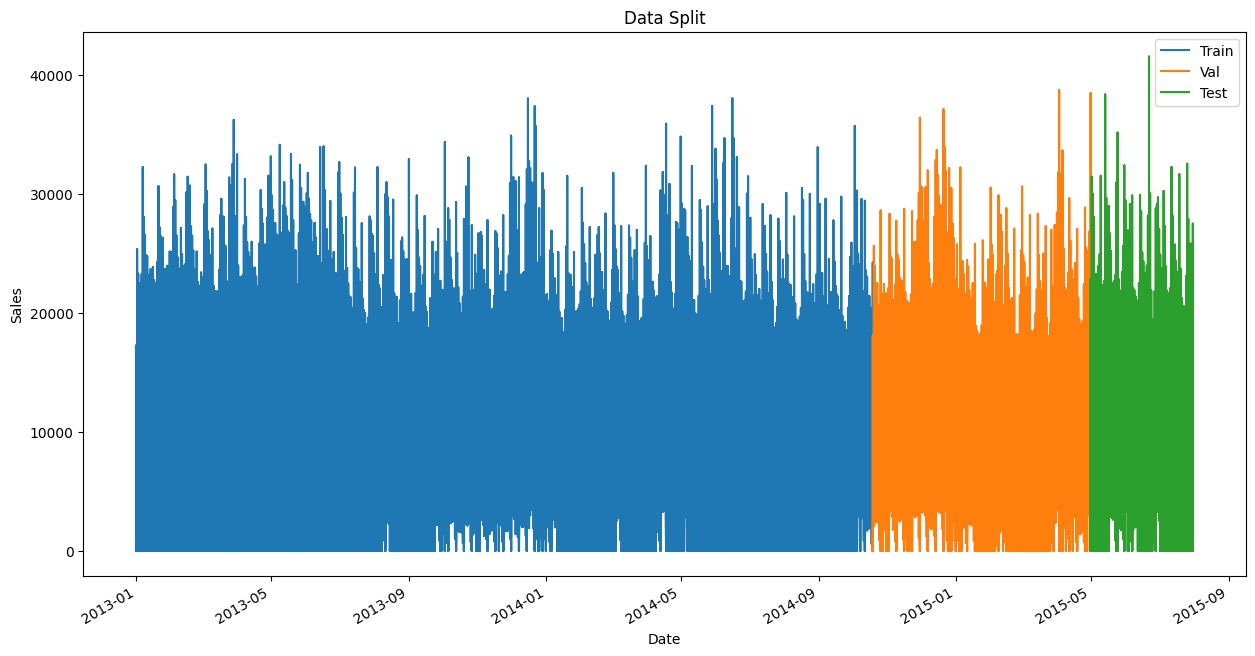

In [25]:
plt.figure(figsize=(15,8))
ax = y_train_onehot.plot()
y_val_onehot.plot(ax=ax)
y_test_onehot.plot(ax=ax)
plt.legend(['Train', 'Val', 'Test'])
plt.title('Data Split')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler_onehot = MinMaxScaler()
X_train_scaled_onehot = scaler_onehot.fit_transform(X_train_onehot) 
X_val_scaled_onehot = scaler_onehot.transform(X_val_onehot) 
X_test_scaled_onehot = scaler_onehot.transform(X_test_onehot) 

In [27]:
def try_model(model, X_train_scaled, y_train, X_val_scaled, y_val):
    # Fit the model
    model.fit(X_train_scaled, y_train)
#
    # Generate predictions
    train_preds = model.predict(X_train_scaled)
    val_preds = model.predict(X_val_scaled)
    
    # Compute RMSE
    train_rmse = rmspe(y_train,train_preds)
    val_rmse = rmspe(y_val,val_preds)
    return train_rmse, val_rmse 

In [28]:
from xgboost import XGBRegressor

model_onehot= XGBRegressor()
try_model(model_onehot, X_train_scaled_onehot, y_train_onehot,X_val_scaled_onehot,y_val_onehot  )

(np.float64(0.12252701196903244), np.float64(0.14098563760862037))

# label encoding model

In [29]:
(X_train_la,y_train_la ), (X_val_la,y_val_la ), (X_test_la,y_test_la ) = split_data(df_com_la)

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler_onehot = MinMaxScaler()
X_train_scaled_la = scaler_onehot.fit_transform(X_train_la) 
X_val_scaled_la= scaler_onehot.transform(X_val_la) 
X_test_scaled_la = scaler_onehot.transform(X_test_la)

In [31]:
from xgboost import XGBRegressor

model_la= XGBRegressor()
try_model(model_la, X_train_scaled_la, y_train_la,X_val_scaled_la,y_val_la  )

(np.float64(0.09771823823713285), np.float64(0.12564833465994688))

# feature importance

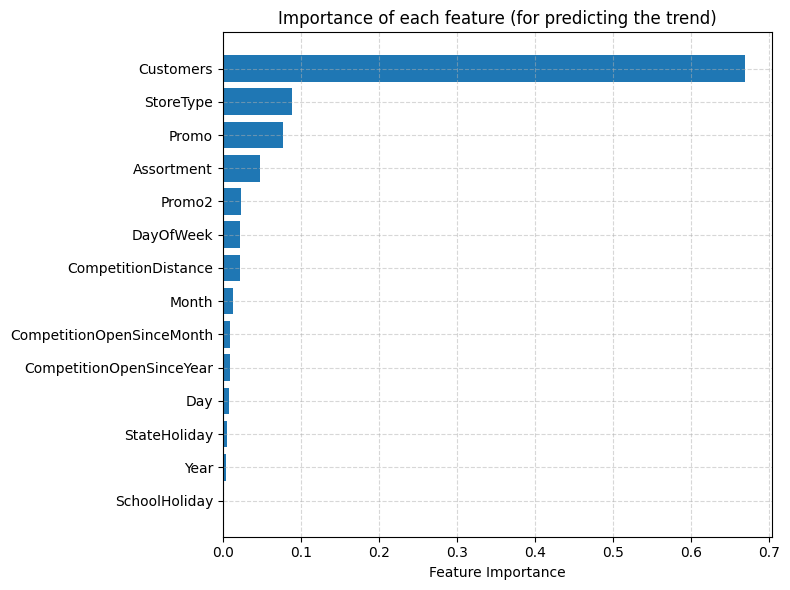

In [32]:
importances = model_la.feature_importances_
feature_names = X_train_la.columns
indices = np.argsort(importances)

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))

plt.title('Importance of each feature (for predicting the trend)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Feature Importance')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# fine tuning the model

In [33]:
# Assuming you have already defined your X_train_la, y_train_la, and X_test
np.random.seed(42)
model_xgb1 = XGBRegressor()

params = {
    "n_estimators" : [50, 100, 150] ,
}

grid = GridSearchCV(estimator=model_xgb1, param_grid=params, n_jobs=-1, verbose=1, cv =None)
grid.fit(X_train_scaled_la, y_train_la)

print("Best parameters:", grid.best_params_)
best_model_xgb = grid.best_estimator_
pred_grid = best_model_xgb.predict(X_val_scaled_la)
print("RMSPE:", rmspe(y_val_la, pred_grid))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'n_estimators': 150}
RMSPE: 0.11928295443037427


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
model_xgb_best1 = XGBRegressor( n_estimators = 150, booster='gbtree', device = 'cuda', random_state = 42)
model_xgb_best1.fit(X_train_scaled_la, y_train_la)

y_hat_xgb1 = model_xgb_best1.predict(X_val_scaled_la)
print(rmspe(y_val_la, y_hat_xgb1))
rmspe_value=rmspe(y_val_onehot, pred_grid)
mse_value = mean_squared_error(y_val_onehot, pred_grid)
rmse_value = np.sqrt(mse_value)
r2_value = r2_score(y_val_onehot, pred_grid)

# Print nicely
print(f"✅ Metrics for XGBoost Model:")
print(f"RMSPE: {rmspe_value:.4f}")
print(f"MSE:   {mse_value:.2f}")
print(f"RMSE:  {rmse_value:.2f}")
print(f"R²:    {r2_value:.4f}")

0.11928300808508879
✅ Metrics for Random Forest Model:
RMSPE: 0.1193
MSE:   386349.22
RMSE:  621.57
R²:    0.9760


d:\anaconda\envs\appliedML\lib\site-packages\xgboost\core.py:729: UserWarning: [22:32:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


In [35]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
model_rf1= RandomForestRegressor()
params = {
    "n_estimators" : [50, 100, 150] , 
}

grid = GridSearchCV(estimator=model_rf1, param_grid=params, n_jobs=-1, verbose=1)
grid.fit(X_train_scaled_la, y_train_la)

best_model_rf = grid.best_estimator_
print("Best parameters:", grid.best_params_)
pred_grid = best_model_rf.predict(X_val_scaled_la)
print("RMSPE:", rmspe(y_val_la, pred_grid))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


d:\anaconda\envs\appliedML\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "d:\anaconda\envs\appliedML\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\anaconda\envs\appliedML\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\anaconda\envs\appliedML\lib\site-packages\sklearn\ensemble\_forest.py", line 487, in fit
    trees = Parallel(
  File "d:\anaconda\envs\appliedML\lib\site

Best parameters: {'n_estimators': 50}
RMSPE: 0.08009511090885131


In [36]:
model_rf_best1 = RandomForestRegressor(n_estimators = 150)
model_rf_best1.fit(X_train_scaled_la, y_train_la)
y_hat_rf1 = model_rf_best1.predict(X_val_scaled_la)
print(rmspe(y_val_la, y_hat_rf1))

0.07920957618361689


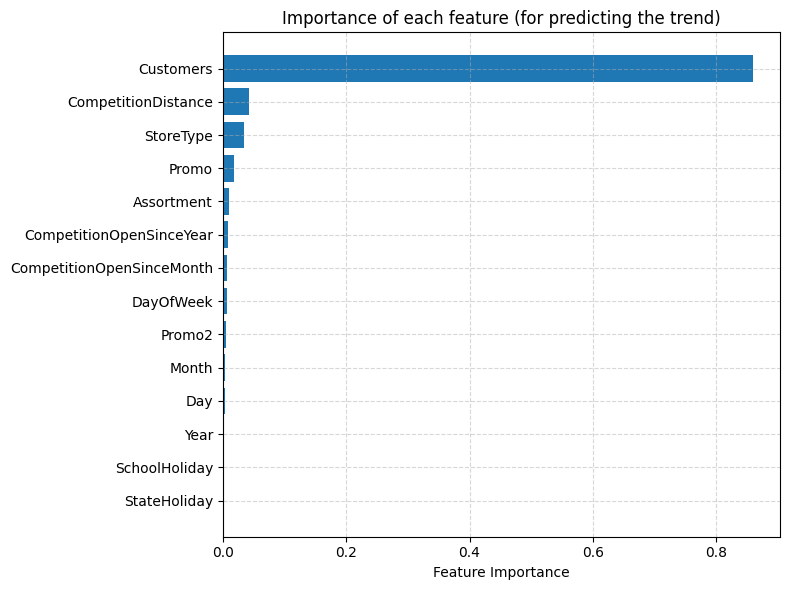

In [37]:
importances = model_rf_best1.feature_importances_
feature_names = X_train_la.columns
indices = np.argsort(importances)

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))

plt.title('Importance of each feature (for predicting the trend)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Feature Importance')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [38]:
y_ensemble = (y_hat_rf1 + y_hat_xgb1 * 0.75)  / (2)
print(rmspe(y_val_la, y_ensemble))

0.15745812344196675


# feature selection

In [39]:
df_xgb = df_com_la.drop(columns = ['Year', 'StateHoliday', 'SchoolHoliday'])
df_rf =  df_com_la.drop(columns = ['Year', 'StateHoliday', 'SchoolHoliday'])

In [40]:
(X_train1,y_train1 ), (X_val1,y_val1 ), (X_test1,y_test1 ) = split_data(df_xgb)
(X_train2,y_train2 ), (X_val2,y_val2 ), (X_test2,y_test2 ) = split_data(df_rf)

# model XGB

In [41]:
scaler1 = MinMaxScaler()
X_train_scaled1 = scaler1.fit_transform(X_train1) 
X_val_scaled1= scaler1.transform(X_val1) 
X_test_scaled1 = scaler1.transform(X_test1)

In [42]:
np.random.seed(42)
model_xgb2 = XGBRegressor()

params = {
    "n_estimators" : [50, 100, 150] ,
}

grid = GridSearchCV(estimator=model_xgb2, param_grid=params, n_jobs=-1, verbose=1, cv =None)
grid.fit(X_train_scaled1, y_train1)

print("Best parameters:", grid.best_params_)
best_model_xgb = grid.best_estimator_
pred_grid = best_model_xgb.predict(X_val_scaled1)
print("RMSPE:", rmspe(y_val1, pred_grid))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'n_estimators': 150}
RMSPE: 0.12161100332995238


In [43]:
model_xgb_best2 = XGBRegressor( n_estimators = 150, booster='gbtree', device = 'cuda', random_state = 42)
model_xgb_best2.fit(X_train_scaled1, y_train1)

y_hat_xgb2 = model_xgb_best2.predict(X_val_scaled1)
rmspe_value=rmspe(y_val_onehot, y_hat_xgb2)
mse_value = mean_squared_error(y_val_onehot, y_hat_xgb2)
rmse_value = np.sqrt(mse_value)
r2_value = r2_score(y_val_onehot, y_hat_xgb2)

# Print nicely
print(f"✅ Metrics for XGBoost Model:")
print(f"RMSPE: {rmspe_value:.4f}")
print(f"MSE:   {mse_value:.2f}")
print(f"RMSE:  {rmse_value:.2f}")
print(f"R²:    {r2_value:.4f}")

✅ Metrics for XGBoost Model:
RMSPE: 0.1216
MSE:   401314.88
RMSE:  633.49
R²:    0.9750


In [44]:
scaler2 = MinMaxScaler()
X_train_scaled2 = scaler2.fit_transform(X_train2) 
X_val_scaled2 = scaler2.transform(X_val2) 
X_test_scaled2 = scaler2.transform(X_test2) 

In [45]:
model_rf2= RandomForestRegressor()
params = {
    "n_estimators" : [ 50, 100, 150] , # Removed extra space
}

grid = GridSearchCV(estimator=model_rf2, param_grid=params, n_jobs=-1, verbose=1, cv =3)
grid.fit(X_train_scaled2, y_train2)

best_model_rf = grid.best_estimator_
print("Best parameters:", grid.best_params_)
pred_grid = best_model_rf.predict(X_val_scaled2)
rmspe_value=rmspe(y_val_onehot, pred_grid)
mse_value = mean_squared_error(y_val_onehot, pred_grid)
rmse_value = np.sqrt(mse_value)
r2_value = r2_score(y_val_onehot, pred_grid)

# Print nicely
print(f"✅ Metrics for RandomForest Model:")
print(f"RMSPE: {rmspe_value:.4f}")
print(f"MSE:   {mse_value:.2f}")
print(f"RMSE:  {rmse_value:.2f}")
print(f"R²:    {r2_value:.4f}")

Fitting 3 folds for each of 3 candidates, totalling 9 fits


d:\anaconda\envs\appliedML\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "d:\anaconda\envs\appliedML\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\anaconda\envs\appliedML\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\anaconda\envs\appliedML\lib\site-packages\sklearn\ensemble\_forest.py", line 487, in fit
    trees = Parallel(
  File "d:\anaconda\envs\appliedML\lib\site-

Best parameters: {'n_estimators': 50}
✅ Metrics for RandomForest Model:
RMSPE: 0.0810
MSE:   369922.83
RMSE:  608.21
R²:    0.9770


In [46]:
model_rf_best2 = RandomForestRegressor(n_estimators = 100, random_state = 42)
model_rf_best2.fit(X_train_scaled2, y_train2)
y_hat_rf2 = model_rf_best2.predict(X_val_scaled2)
# print(rmspe(y_val2, y_hat_rf2))
rmspe_value=rmspe(y_val_onehot, y_hat_rf2)
mse_value = mean_squared_error(y_val_onehot, y_hat_rf2)
rmse_value = np.sqrt(mse_value)
r2_value = r2_score(y_val_onehot, y_hat_rf2)

# Print nicely
print(f"✅ Metrics for RandomForest Model:")
print(f"RMSPE: {rmspe_value:.4f}")
print(f"MSE:   {mse_value:.2f}")
print(f"RMSE:  {rmse_value:.2f}")
print(f"R²:    {r2_value:.4f}")

✅ Metrics for RandomForest Model:
RMSPE: 0.0803
MSE:   365106.37
RMSE:  604.24
R²:    0.9773


# evaluation

In [47]:
y_pred1 = model_rf_best1.predict(X_test_scaled_la)
y_pred2 = model_xgb_best1.predict(X_test_scaled_la)
y_pred3 = model_rf_best2.predict(X_test_scaled2)
y_pred4 = model_xgb_best2.predict(X_test_scaled1)

In [50]:
print('rmspe  model rf', rmspe(y_test_la, y_pred1))
print('rmspe  model xgb', rmspe(y_test_la, y_pred2))
print('rmspe  model rf with select', rmspe(y_test_la, y_pred3))
print('rmspe  model xgb with select', rmspe(y_test_la, y_pred4))

rmspe  model rf 0.08449124222161637
rmspe  model xgb 0.0916076093817776
rmspe  model rf with select 0.08620535035458553
rmspe  model xgb with select 0.0938245681077315


In [49]:
df_all

,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Day,Month,Year
Date,,,,,,,,,,,,,,,
2015-07-31,5,5263,555,1,0,1,c,a,7.146772,9.0,2008.0,0,31,7,2015
2015-07-31,5,6064,625,1,0,1,a,a,6.345636,11.0,2007.0,1,31,7,2015
2015-07-31,5,8314,821,1,0,1,a,a,9.556055,12.0,2006.0,1,31,7,2015
2015-07-31,5,13995,1498,1,0,1,c,c,6.429719,9.0,2009.0,0,31,7,2015
2015-07-31,5,4822,559,1,0,1,a,a,10.305948,4.0,2015.0,0,31,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,2,0,0,0,a,1,a,a,7.549609,6.0,2014.0,1,1,1,2013
2013-01-01,2,0,0,0,a,1,c,c,7.539027,4.0,2006.0,0,1,1,2013
2013-01-01,2,0,0,0,a,1,a,c,9.133459,10.0,2006.0,0,1,1,2013
